In [ ]:
#Se puede usar el tratamiento de datos realizado para machine learning
#no puede haber NA's 
#Hacer un primer modelo con redes sencillas 1D, con datos numéricos

In [71]:
import numpy as np
import pandas as pd
from numpy import nan as NA
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split

# Se descarga el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"



--2023-02-19 02:35:09--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [   <=>              ]  54.31M  3.13MB/s    in 18s     

2023-02-19 02:35:28 (3.09 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [72]:
!ls -lah

total 202M
drwxr-xr-x 1 root root 4.0K Feb 18 23:10 .
drwxr-xr-x 1 root root 4.0K Feb 18 21:39 ..
-rw-r--r-- 1 root root  55M Feb 19 02:35 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Feb 17 19:29 .config
drwx------ 6 root root 4.0K Feb 18 23:10 drive
-rw-r--r-- 1 root root 3.8M Feb 19 01:49 final_data.npy
-rw-r--r-- 1 root root 144M Feb 19 01:49 images.npy
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data


In [73]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros

data = pd.read_csv('airbnb-listings.csv', sep = ';')

data = data.loc[:,['City','Thumbnail Url','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude']]
data.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2,1.0,0.0,1.0,50.0,NaN,2,15,96.0,40.407453,-3.707995
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4,1.0,1.0,2.0,50.0,NaN,2,25,81.0,40.408316,-3.705006
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4,1.5,1.0,2.0,77.0,NaN,1,0,89.0,40.413722,-3.706823
3,Madrid,NaN,Entire home/apt,Embajadores,2,1.0,1.0,2.0,50.0,NaN,1,20,93.0,40.411263,-3.697305
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5,1.0,2.0,4.0,95.0,NaN,4,0,97.0,40.412556,-3.701155


In [74]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 15)

In [75]:
#Nos quedarmos solo con las entradas de Madrid para Room Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio '' Podemos eliminar las siguientes columnas que ya no son necesarias: "Room.Type",'City'

#Nuevo dataframe nombrado como df_madrid.

data_madrid = data.loc[data['City'] == 'Madrid', :] 

data_madrid.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2,1.0,0.0,1.0,50.0,NaN,2,15,96.0,40.407453,-3.707995
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4,1.0,1.0,2.0,50.0,NaN,2,25,81.0,40.408316,-3.705006
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4,1.5,1.0,2.0,77.0,NaN,1,0,89.0,40.413722,-3.706823
3,Madrid,NaN,Entire home/apt,Embajadores,2,1.0,1.0,2.0,50.0,NaN,1,20,93.0,40.411263,-3.697305
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5,1.0,2.0,4.0,95.0,NaN,4,0,97.0,40.412556,-3.701155


In [76]:
data_madrid.shape

(13207, 15)

In [77]:
data_madrid = data_madrid.loc[data_madrid['Room Type'] == 'Entire home/apt', :] 
data_madrid = data_madrid.loc[data_madrid['Neighbourhood'] != '', :] 
data_madrid.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2,1.0,0.0,1.0,50.0,NaN,2,15,96.0,40.407453,-3.707995
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4,1.0,1.0,2.0,50.0,NaN,2,25,81.0,40.408316,-3.705006
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4,1.5,1.0,2.0,77.0,NaN,1,0,89.0,40.413722,-3.706823
3,Madrid,NaN,Entire home/apt,Embajadores,2,1.0,1.0,2.0,50.0,NaN,1,20,93.0,40.411263,-3.697305
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5,1.0,2.0,4.0,95.0,NaN,4,0,97.0,40.412556,-3.701155


In [78]:
data_madrid.shape

(7903, 15)

In [79]:
#Creo columna 'Square Meters' basada en 'Square Feet', con la intención de usar una unidad de medida conocida
data_madrid['Square Meters'] = data_madrid['Square Feet'] * 0.092903

#Elimino columna Square Feet
data_madrid.drop(['Square Feet'],axis=1)

data_madrid.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meters
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2,1.0,0.0,1.0,50.0,NaN,2,15,96.0,40.407453,-3.707995,NaN
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4,1.0,1.0,2.0,50.0,NaN,2,25,81.0,40.408316,-3.705006,NaN
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4,1.5,1.0,2.0,77.0,NaN,1,0,89.0,40.413722,-3.706823,NaN
3,Madrid,NaN,Entire home/apt,Embajadores,2,1.0,1.0,2.0,50.0,NaN,1,20,93.0,40.411263,-3.697305,NaN
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5,1.0,2.0,4.0,95.0,NaN,4,0,97.0,40.412556,-3.701155,NaN


In [80]:
#identifico cantidad de elementos vacíos en 'Square Meters'

na_sq_meters = data_madrid['Square Meters'].isnull().sum()
na_sq_meters

7546

In [81]:
#Convierto en NA los elementos de 'Square Meters' que tienen como valor cero
data_madrid.loc[data_madrid['Square Meters']==0] = np.nan
data_madrid

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meters
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2.0,1.0,0.0,1.0,50.0,NaN,2.0,15.0,96.0,40.407453,-3.707995,NaN
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4.0,1.0,1.0,2.0,50.0,NaN,2.0,25.0,81.0,40.408316,-3.705006,NaN
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4.0,1.5,1.0,2.0,77.0,NaN,1.0,0.0,89.0,40.413722,-3.706823,NaN
3,Madrid,NaN,Entire home/apt,Embajadores,2.0,1.0,1.0,2.0,50.0,NaN,1.0,20.0,93.0,40.411263,-3.697305,NaN
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5.0,1.0,2.0,4.0,95.0,NaN,4.0,0.0,97.0,40.412556,-3.701155,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,Madrid,NaN,Entire home/apt,Centro,4.0,1.0,1.0,1.0,70.0,NaN,1.0,0.0,NaN,40.412672,-3.699217,NaN
13989,Madrid,https://a0.muscache.com/im/pictures/c5d97dd0-b...,Entire home/apt,NaN,4.0,1.0,1.0,1.0,80.0,NaN,2.0,5.0,98.0,40.411872,-3.697796,NaN
13991,Madrid,https://a0.muscache.com/im/pictures/98edec63-6...,Entire home/apt,Cortes,4.0,1.0,1.0,3.0,80.0,NaN,2.0,9.0,95.0,40.412930,-3.695167,NaN
13993,Madrid,NaN,Entire home/apt,NaN,4.0,1.0,1.0,2.0,70.0,NaN,2.0,10.0,94.0,40.414122,-3.697248,NaN


In [82]:
#Elimino los barrios para los cuales todos los elementos tienen 'Square Meters' igual a NA

data_Neighbourhoods_no_na = data_madrid.loc[data_madrid['Square Feet'].notnull()]
data_Neighbourhoods_no_na.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meters
47,Madrid,https://a0.muscache.com/im/pictures/24693808/3...,Entire home/apt,La Latina,6.0,2.0,2.0,2.0,72.0,592.0,2.0,20.0,90.0,40.412057,-3.709149,54.998576
142,Madrid,NaN,Entire home/apt,Acacias,4.0,1.0,1.0,2.0,60.0,538.0,2.0,15.0,98.0,40.405129,-3.707726,49.981814
202,Madrid,https://a0.muscache.com/im/pictures/11900727/2...,Entire home/apt,Malasaña,4.0,1.0,2.0,3.0,105.0,753.0,1.0,0.0,97.0,40.429004,-3.703498,69.955959
215,Madrid,https://a0.muscache.com/im/pictures/228d5c7c-a...,Entire home/apt,Recoletos,2.0,1.0,0.0,2.0,61.0,323.0,1.0,0.0,92.0,40.428002,-3.686409,30.007669
247,Madrid,https://a0.muscache.com/im/pictures/25902838/a...,Entire home/apt,Malasaña,8.0,2.0,3.0,4.0,120.0,1184.0,6.0,0.0,83.0,40.421984,-3.705419,109.997152


In [83]:
data_madrid = data_madrid.loc[data_madrid['Neighbourhood'].isin(data_Neighbourhoods_no_na['Neighbourhood'])]
data_madrid.head()

,City,Thumbnail Url,Room Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meters
0,Madrid,https://a0.muscache.com/im/pictures/d1a2212d-c...,Entire home/apt,NaN,2.0,1.0,0.0,1.0,50.0,NaN,2.0,15.0,96.0,40.407453,-3.707995,NaN
1,Madrid,https://a0.muscache.com/im/pictures/3eb59287-8...,Entire home/apt,NaN,4.0,1.0,1.0,2.0,50.0,NaN,2.0,25.0,81.0,40.408316,-3.705006,NaN
2,Madrid,https://a0.muscache.com/im/pictures/de09fac7-9...,Entire home/apt,NaN,4.0,1.5,1.0,2.0,77.0,NaN,1.0,0.0,89.0,40.413722,-3.706823,NaN
3,Madrid,NaN,Entire home/apt,Embajadores,2.0,1.0,1.0,2.0,50.0,NaN,1.0,20.0,93.0,40.411263,-3.697305,NaN
4,Madrid,https://a0.muscache.com/im/pictures/6136974/57...,Entire home/apt,Embajadores,5.0,1.0,2.0,4.0,95.0,NaN,4.0,0.0,97.0,40.412556,-3.701155,NaN


In [84]:
#Mido el porcentaje de ceros
#Identifico el número de elementos de 'Square Meters' que no son NA y tienen como valor cero
no_na_madrid = data_madrid['Square Meters'].notnull().sum()
#
print(f'Número de elementos que no son NaN: {no_na_madrid}')
cerom_madrid = (data_madrid['Square Meters']==0).sum()
print(f'Número de elementos que no son NaN y son cero: {cerom_madrid}')
porcentaje_cerom_madrid = (cerom_madrid/no_na_madrid)*100
print(f'El porcentaje de elementos que no son NaN y son cero es: {porcentaje_cerom_madrid} %')

Número de elementos que no son NaN: 227
Número de elementos que no son NaN y son cero: 0
El porcentaje de elementos que no son NaN y son cero es: 0.0 %


In [85]:
# ¿De qué variables disponemos?
data_madrid.columns

Index(['City', 'Thumbnail Url', 'Room Type', 'Neighbourhood', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Square Feet',
       'Guests Included', 'Extra People', 'Review Scores Rating', 'Latitude',
       'Longitude', 'Square Meters'],
      dtype='object')

In [86]:
import imageio as io
import numpy as np
import cv2
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_madrid['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 4 descargada
4
Imagen 11 descargada
5
Imagen 13 descargada
6
Imagen 14 descargada
7
Imagen 19 descargada
8
Imagen 20 descargada
9
Imagen 21 descargada
10
Imagen 22 descargada
11
Imagen 24 descargada
12
Imagen 26 descargada
13
Imagen 27 descargada
14
Imagen 28 descargada
15
Imagen 29 descargada
16
Imagen 30 descargada
17
Imagen 33 descargada
18
Imagen 34 descargada
19
Imagen 35 descargada
20
Imagen 36 descargada
21
Imagen 39 descargada
22
Imagen 41 descargada
23
Imagen 42 descargada
24
Imagen 43 descargada
25
Imagen 44 descargada
26
Imagen 45 descargada
27
Imagen 46 descargada
28
Imagen 47 descargada
29
Imagen 48 descargada
30
Imagen 50 descargada
31
Imagen 52 descargada
32
Imagen 54 descargada
33
Imagen 56 descargada
34
Imagen 67 descargada
35
Imagen 68 descargada
36
Imagen 71 descargada
37
Imagen 73 descargada
38
Imagen 75 descargada
39
Imagen 76 descargada
40
Imagen 77 descargada
41
Imagen 78 descargada
42
Image

In [11]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [12]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]

In [13]:
print(final_data.shape)

(1000, 89)


In [14]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']

In [30]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)


In [31]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/My\ Drive/images.npy
!cp final_data.npy /content/drive/My\ Drive/final_data.npy

In [33]:
!ls -lah images.npy final_data.npy

-rw-r--r-- 1 root root 3.8M Feb 19 01:49 final_data.npy
-rw-r--r-- 1 root root 144M Feb 19 01:49 images.npy


In [34]:
# Obtener las etiquetas de regresion
y_reg = final_data['Price']
y_reg.head(5)

0    50.0
1    50.0
2    77.0
4    95.0
7    30.0
Name: Price, dtype: float64

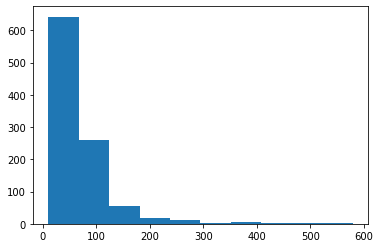

In [35]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [36]:
y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

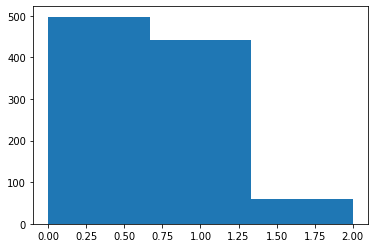

In [37]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

In [50]:
import pandas as pd

path = "/content/final_data.npy"
df = np.load(path, allow_pickle=True)
df.head()

AttributeError: ignored

In [49]:
import numpy as np
import pandas as pd
from numpy import nan as NA
pd.options.display.max_columns = None

df = df.loc[:,['City','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude']]
df.head()

AttributeError: ignored

In [1]:
(X_train, y_train), (X_test, y_test) = final_data
validation_split = 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_split, random_state=SEED)


NameError: ignored

In [ ]:
#Preparación de datos

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [ ]:
#Ejercicio 1 para práctica Deep Learning: modificar este modelo para adaptarlo 
#a los datos del dataset, con base en datos 1D
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_deep_net(activation_function, learning_rate, lr_decay, batch_size, num_epochs):
  
  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Flatten()) # Estiramos los datos en forma de vector como entrada 
  model.add(Dense(200, activation=activation_function)) 
  model.add(Dense(100, activation=activation_function)) 
  model.add(Dense(60, activation=activation_function)) 
  model.add(Dense(30, activation=activation_function)) 
  model.add(Dense(10, input_shape=(784,), activation="softmax")) 
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate, decay=lr_decay/num_epochs), metrics=["accuracy"])  #(X)

  # Entrenando la solución
  H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)  #(X)
  model.summary()
  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x_te, batch_size=batch_size) 
  print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()